In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import os
from datetime import datetime
import json

from train_utils import augmented_train, plot_losses, MAE_SSIM_loss, MSE_loss, predictions, CreateDataset

# 4D-UNet model
from models import UNet4D

The 4D-UNet was developed with 4D convolutions from Josué Page Vizcaíno which can be found here: https://github.com/pvjosue/pytorch_convNd/tree/master 

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device: {device}')

torch.set_default_dtype(torch.float32)

Device: cuda


In [ ]:
def set_seed(seed=42):
    # Set seed for reproducibility
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

set_seed(42)

### Loading data

Input and label data are saved in separate folders, already divided into training, test and validation data. Only training and validation data is loaded in this notebook.

In [4]:
X_train_path = '../preprocessed_4d/ls_train'
X_val_path = '../preprocessed_4d/ls_val'

y_train_path = '../preprocessed_4d/epi_train'
y_val_path = '../preprocessed_4d/epi_val'

X_train_files = [f for f in os.listdir(X_train_path) if f.endswith('.pt')]
X_train = [torch.load(os.path.join(X_train_path, f)) for f in X_train_files]

X_val_files = [f for f in os.listdir(X_val_path) if f.endswith('.pt')]
X_val = [torch.load(os.path.join(X_val_path, f)) for f in X_val_files]

y_train_files = [f for f in os.listdir(y_train_path) if f.endswith('.pt')]
y_train = [torch.load(os.path.join(y_train_path, f)) for f in y_train_files]

y_val_files = [f for f in os.listdir(y_val_path) if f.endswith('.pt')]
y_val = [torch.load(os.path.join(y_val_path, f)) for f in y_val_files]

C:\Users\Caroline\AppData\Local\Temp\ipykernel_19640\917412265.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  X_train = [torch.load(os.path.join(X_train_path, f)) for f

In [ ]:
# Converting X data to torch tensors. y data has already been converted during preprocessing

X_train = [torch.Tensor(image) for image in X_train]
X_val = [torch.Tensor(image) for image in X_val]

In [ ]:
# Creating a training and a validation dataset

train_dataset = CreateDataset(X_train, y_train)
val_dataset = CreateDataset(X_val, y_val)

In [ ]:
# Making sure data range is 1 for SSIM calculation

max_val = -torch.inf
min_val = torch.inf

for img in y_train:
    if torch.max(img) > max_val:
        max_val = torch.max(img)
    if torch.min(img) < min_val:
        min_val = torch.min(img)

ranges = torch.abs(min_val-max_val)
ranges

tensor(1.)

In [19]:
def save_checkpoint(model, optimizer, epoch, loss, filename='checkpoint.pth'):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, filename)

### Model training

Only MSE is tested as loss function in the outputs shown below.

Testing hyperparameter: lr=1e-05
 Epoch 1: Training loss 10.254257883344378 10:35:18.258172 
 Epoch 1: Validation loss 7.388261795043945 10:35:18.258172 


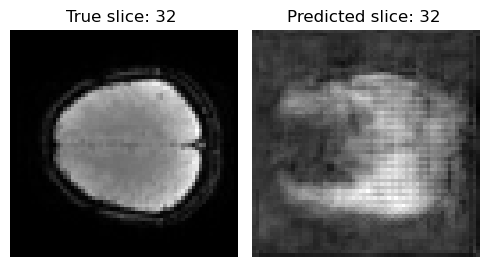

 Epoch 2: Training loss 6.5812715121677945 10:55:55.442035 
 Epoch 2: Validation loss 5.777663707733154 10:55:55.442035 


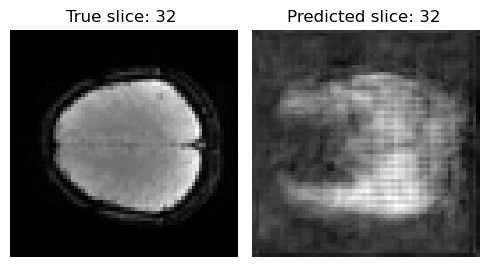

 Epoch 3: Training loss 4.746353047234671 11:15:08.387720 
 Epoch 3: Validation loss 4.565616130828857 11:15:08.387720 


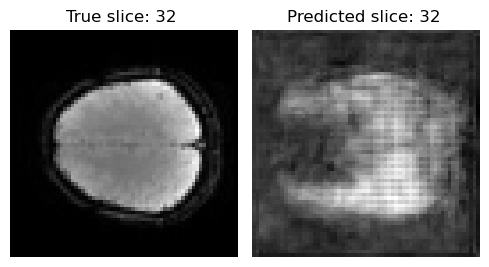

 Epoch 4: Training loss 3.8016024317060197 11:35:17.584059 
 Epoch 4: Validation loss 3.7873282432556152 11:35:17.584059 


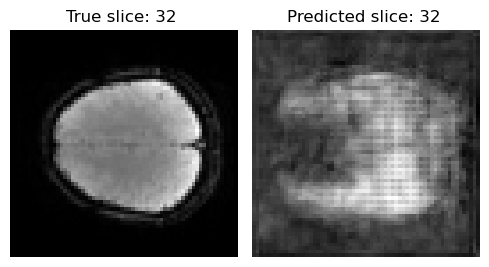

 Epoch 5: Training loss 3.1871953351157054 11:53:53.980331 
 Epoch 5: Validation loss 3.223931074142456 11:53:53.980331 


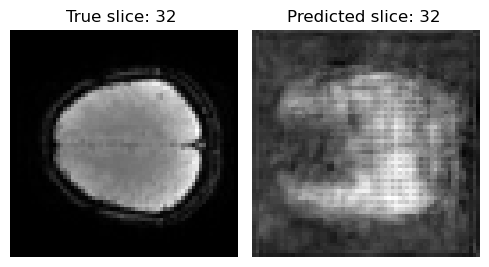

 Epoch 6: Training loss 3.1233619281223843 12:13:38.012711 
 Epoch 6: Validation loss 2.881016254425049 12:13:38.012711 


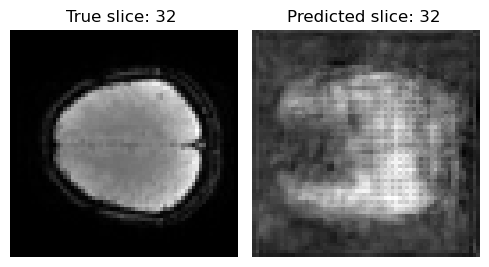

 Epoch 7: Training loss 2.6394234725407193 12:32:13.712264 
 Epoch 7: Validation loss 2.826005458831787 12:32:13.712264 


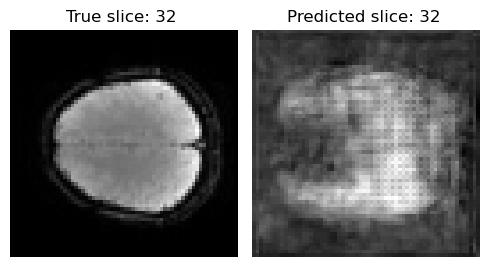

 Epoch 8: Training loss 2.455405729157584 12:51:57.118076 
 Epoch 8: Validation loss 2.6758408546447754 12:51:57.118076 


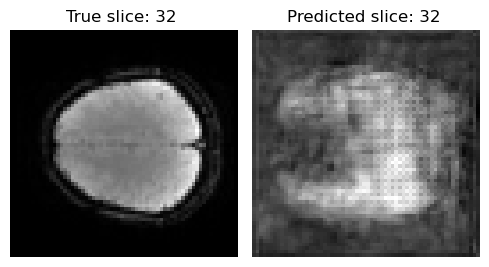

 Epoch 9: Training loss 2.336488366127014 13:10:34.872123 
 Epoch 9: Validation loss 2.676504611968994 13:10:34.872123 


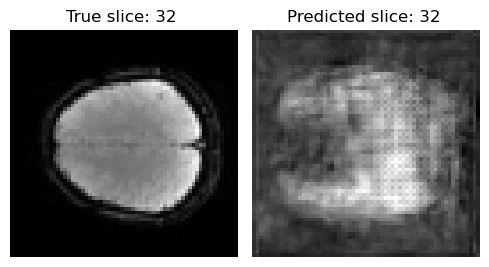

 Epoch 10: Training loss 2.1562082767486572 13:30:21.017142 
 Epoch 10: Validation loss 2.0268633365631104 13:30:21.017142 


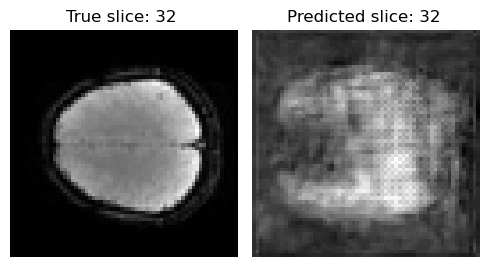

 Epoch 11: Training loss 2.1730346509388516 13:48:57.380843 
 Epoch 11: Validation loss 2.2419426441192627 13:48:57.380843 


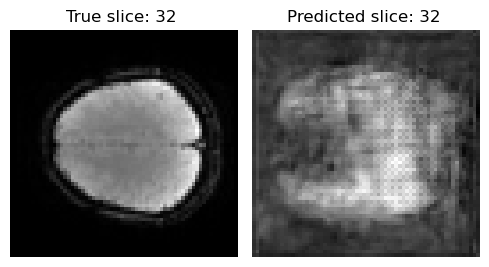

 Epoch 12: Training loss 1.8308436870574951 14:08:41.126454 
 Epoch 12: Validation loss 2.0929832458496094 14:08:41.127452 


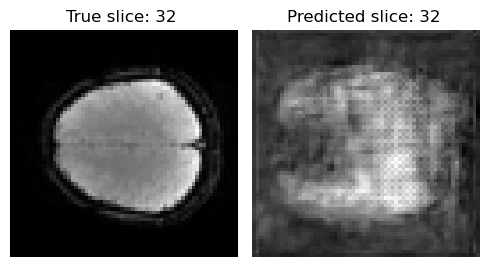

 Epoch 13: Training loss 1.6260467256818498 14:27:16.817275 
 Epoch 13: Validation loss 1.8458518981933594 14:27:16.817275 


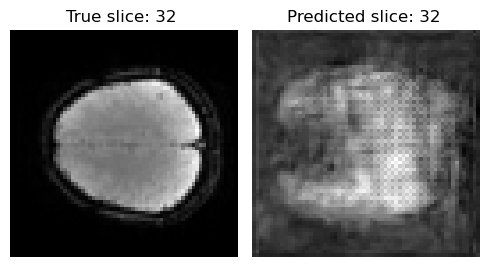

 Epoch 14: Training loss 1.5268271650586809 14:47:00.101833 
 Epoch 14: Validation loss 1.7455004453659058 14:47:00.101833 


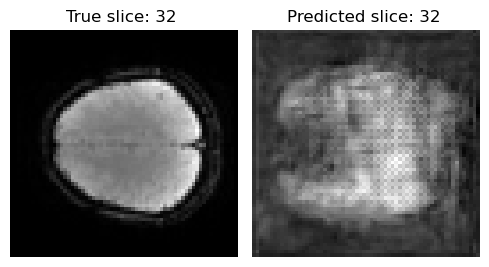

 Epoch 15: Training loss 1.3955889259065901 15:05:36.471242 
 Epoch 15: Validation loss 1.6590906381607056 15:05:36.471242 


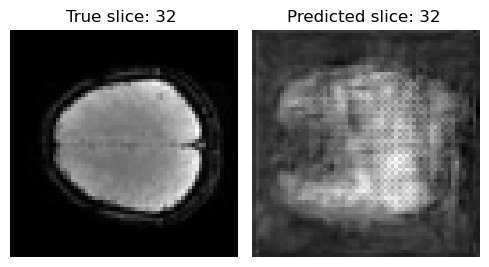

 Epoch 16: Training loss 1.2564461401530675 15:25:18.709381 
 Epoch 16: Validation loss 1.5102068185806274 15:25:18.709381 


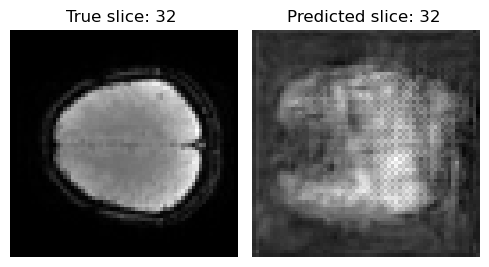

 Epoch 17: Training loss 1.2000312209129333 15:43:54.383520 
 Epoch 17: Validation loss 1.3652962446212769 15:43:54.383520 


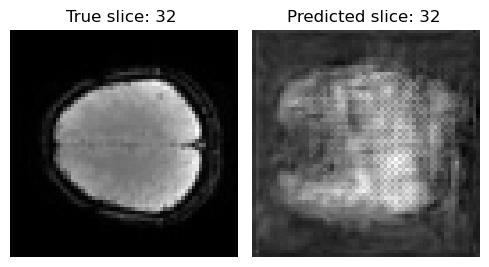

 Epoch 18: Training loss 1.056009488446372 16:03:38.587437 
 Epoch 18: Validation loss 1.2998881340026855 16:03:38.588438 


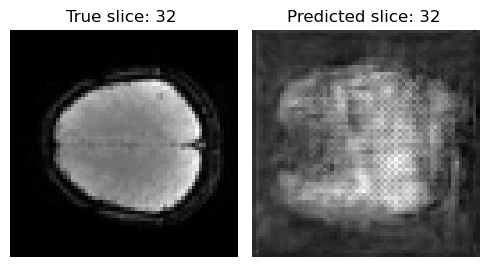

 Epoch 19: Training loss 1.038215628692082 16:22:14.646197 
 Epoch 19: Validation loss 1.226318597793579 16:22:14.646197 


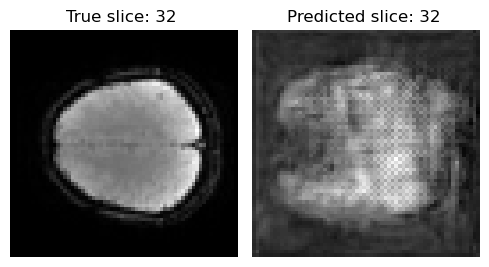

 Epoch 20: Training loss 1.0027798925127303 16:42:07.457385 
 Epoch 20: Validation loss 1.229172706604004 16:42:07.457385 


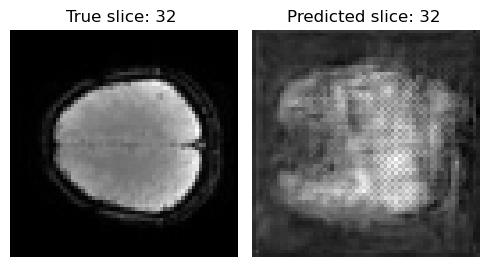

 Epoch 21: Training loss 0.9612293584006173 17:00:43.821107 
 Epoch 21: Validation loss 1.169611930847168 17:00:43.821107 


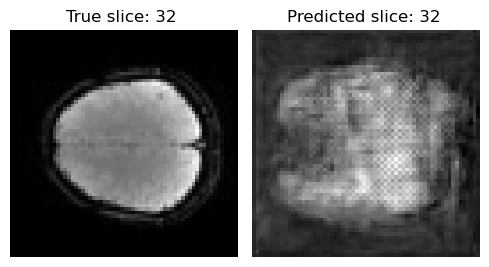

 Epoch 22: Training loss 0.9301054647990635 17:20:26.893734 
 Epoch 22: Validation loss 1.1385372877120972 17:20:26.893734 


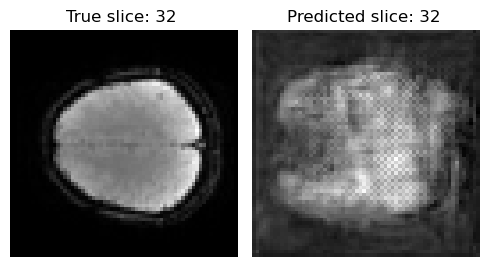

 Epoch 23: Training loss 0.9135369147573199 17:39:02.690459 
 Epoch 23: Validation loss 1.1728509664535522 17:39:02.690459 


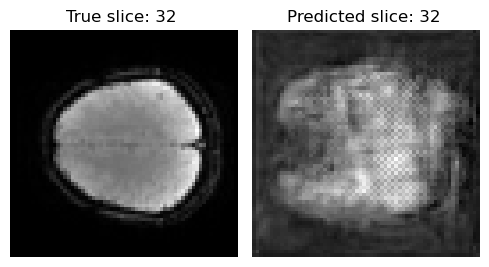

 Epoch 24: Training loss 0.8356700539588928 17:58:46.112293 
 Epoch 24: Validation loss 1.073884129524231 17:58:46.112293 


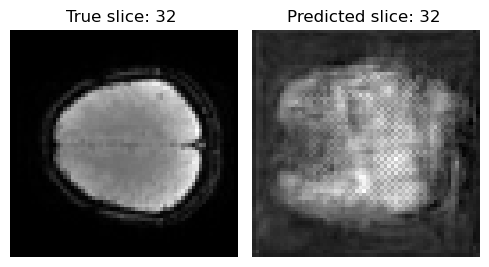

 Epoch 25: Training loss 0.8465650166784014 18:17:21.803162 
 Epoch 25: Validation loss 1.003381609916687 18:17:21.803162 


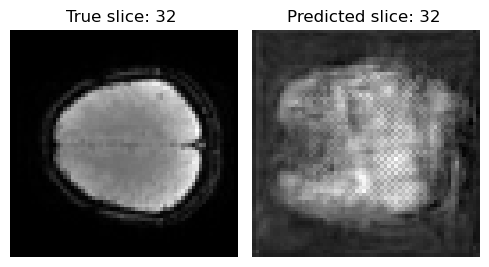

 Epoch 26: Training loss 0.8812322957175118 18:37:04.121543 
 Epoch 26: Validation loss 1.0180343389511108 18:37:04.121543 


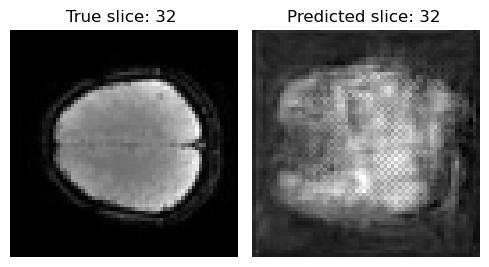

 Epoch 27: Training loss 0.8354225499289376 18:55:41.775884 
 Epoch 27: Validation loss 1.1587331295013428 18:55:41.775884 


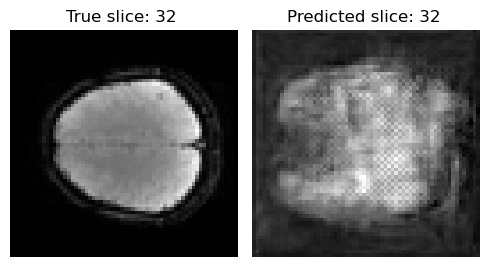

 Epoch 28: Training loss 0.81906144959586 19:15:26.601461 
 Epoch 28: Validation loss 0.9728151559829712 19:15:26.601461 


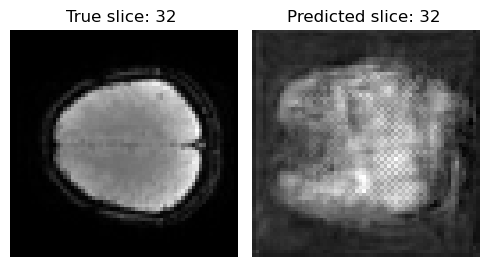

 Epoch 29: Training loss 0.7590596164975848 19:34:02.630439 
 Epoch 29: Validation loss 0.9637693166732788 19:34:02.630439 


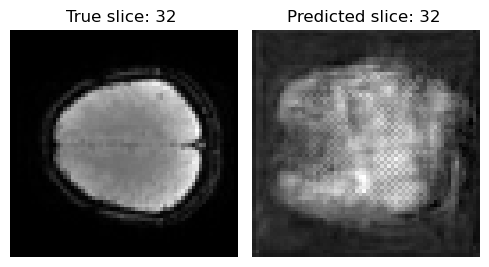

 Epoch 30: Training loss 0.7404224021094186 19:53:46.565573 
 Epoch 30: Validation loss 0.9787748456001282 19:53:46.565573 


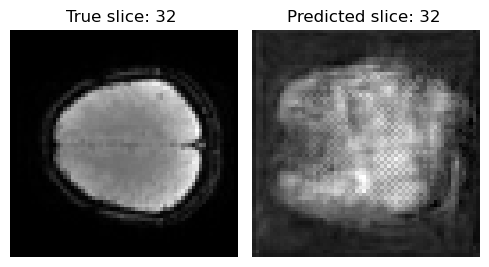

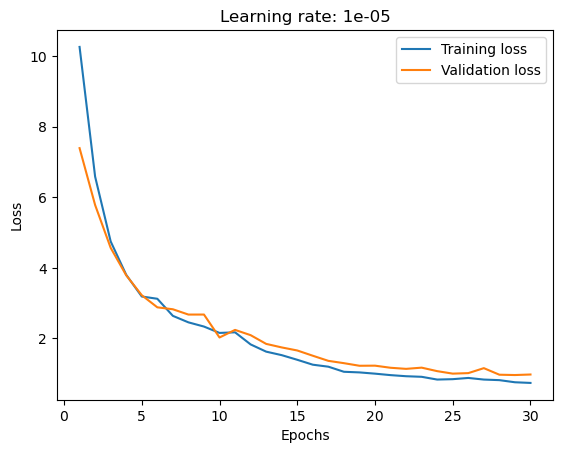

Testing hyperparameter: lr=5e-05
 Epoch 1: Training loss 6.574643271309989 20:12:18.587924 
 Epoch 1: Validation loss 4.022537708282471 20:12:18.587924 


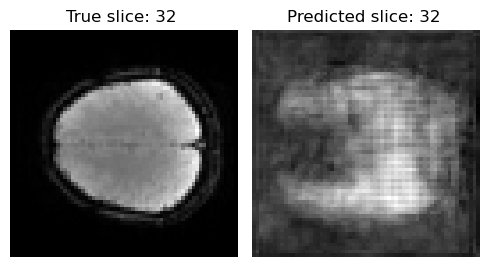

 Epoch 2: Training loss 2.847259998321533 20:31:55.750149 
 Epoch 2: Validation loss 2.6890525817871094 20:31:55.750149 


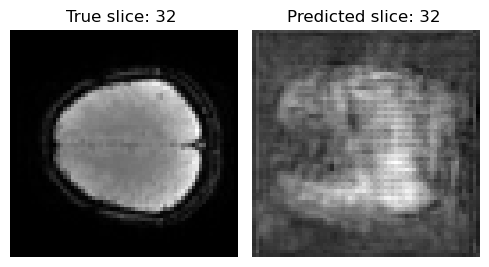

 Epoch 3: Training loss 2.2775861535753523 20:50:25.694614 
 Epoch 3: Validation loss 2.680196762084961 20:50:25.694614 


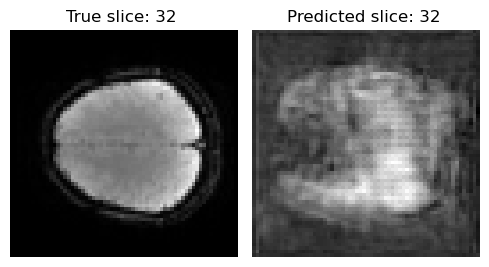

 Epoch 4: Training loss 1.8694344929286413 21:10:03.327529 
 Epoch 4: Validation loss 1.8823634386062622 21:10:03.327529 


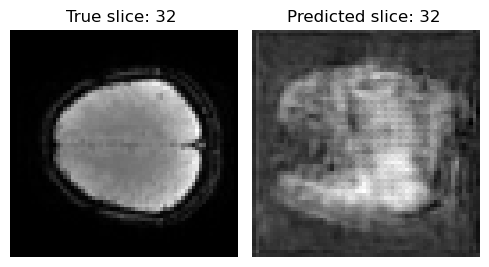

 Epoch 5: Training loss 1.5762701715741838 21:28:33.006742 
 Epoch 5: Validation loss 1.6816291809082031 21:28:33.006742 


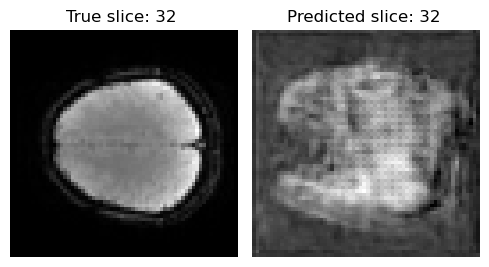

 Epoch 6: Training loss 1.5046388336590357 21:48:10.053767 
 Epoch 6: Validation loss 1.5089519023895264 21:48:10.053767 


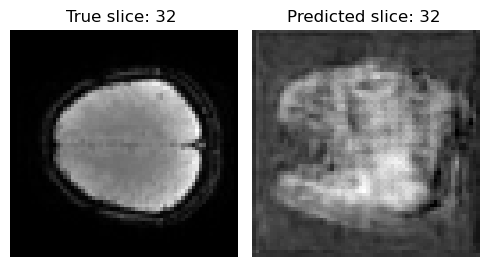

 Epoch 7: Training loss 1.2571595311164856 22:06:40.156824 
 Epoch 7: Validation loss 1.4818379878997803 22:06:40.156824 


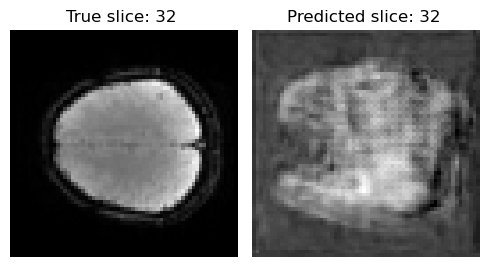

 Epoch 8: Training loss 1.1138440370559692 22:26:16.763725 
 Epoch 8: Validation loss 1.3777223825454712 22:26:16.763725 


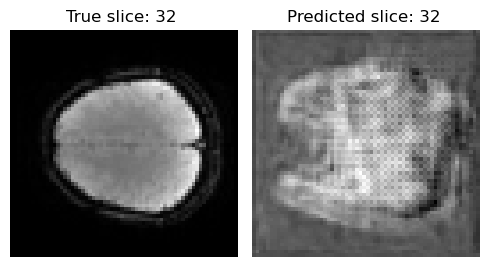

 Epoch 9: Training loss 1.1993208612714494 22:44:45.868253 
 Epoch 9: Validation loss 1.4019137620925903 22:44:45.868253 


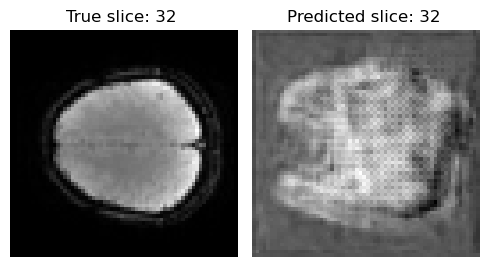

 Epoch 10: Training loss 0.9425359283174787 23:04:22.888478 
 Epoch 10: Validation loss 1.0560345649719238 23:04:22.888478 


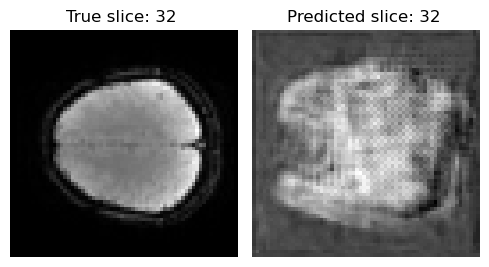

 Epoch 11: Training loss 0.8306500826563153 23:22:52.701291 
 Epoch 11: Validation loss 1.1932257413864136 23:22:52.701291 


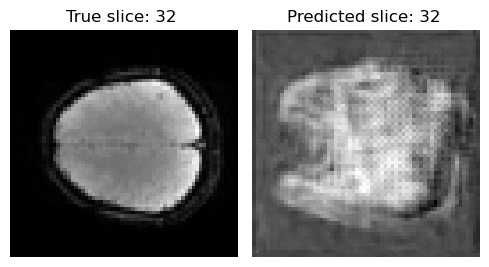

 Epoch 12: Training loss 0.8905467391014099 23:42:29.507363 
 Epoch 12: Validation loss 1.1627459526062012 23:42:29.507363 


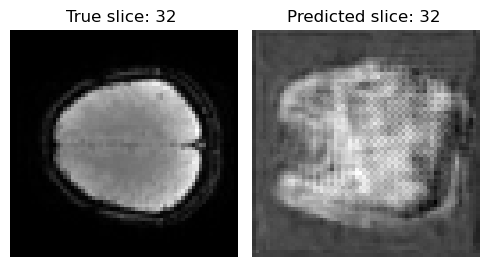

 Epoch 13: Training loss 0.8325950929096767 00:01:00.254879 
 Epoch 13: Validation loss 1.013893723487854 00:01:00.254879 


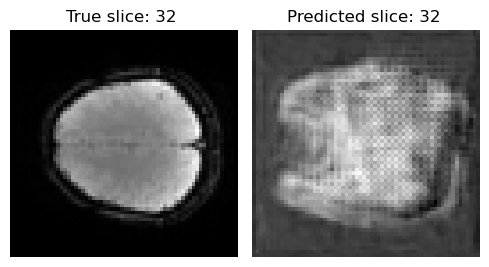

 Epoch 14: Training loss 0.7545749374798366 00:20:36.758342 
 Epoch 14: Validation loss 1.0036362409591675 00:20:36.759349 


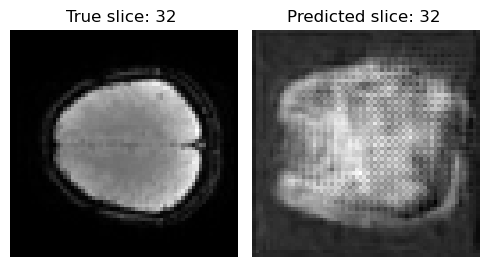

 Epoch 15: Training loss 0.7950995223862785 00:39:06.253018 
 Epoch 15: Validation loss 0.9889009594917297 00:39:06.253018 


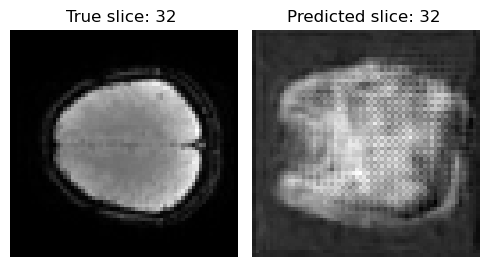

 Epoch 16: Training loss 0.7389590910502842 00:58:43.557105 
 Epoch 16: Validation loss 0.9427313804626465 00:58:43.557105 


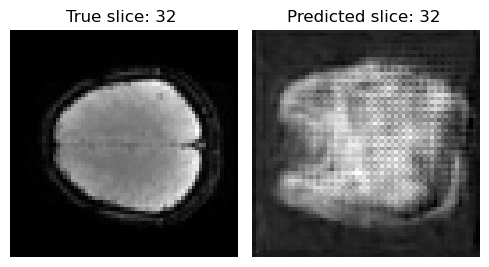

 Epoch 17: Training loss 0.7164083889552525 01:17:13.937766 
 Epoch 17: Validation loss 0.9559601545333862 01:17:13.937766 


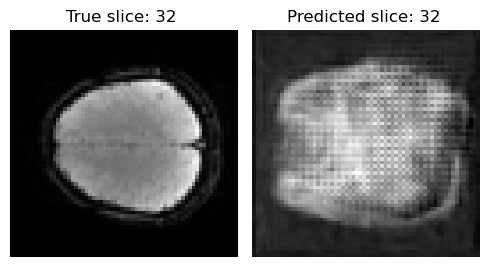

 Epoch 18: Training loss 0.7119602390698024 01:36:51.679825 
 Epoch 18: Validation loss 0.9271675944328308 01:36:51.679825 


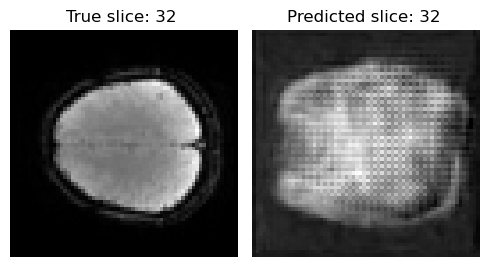

 Epoch 19: Training loss 0.672555685043335 01:55:21.422691 
 Epoch 19: Validation loss 0.8916853666305542 01:55:21.423727 


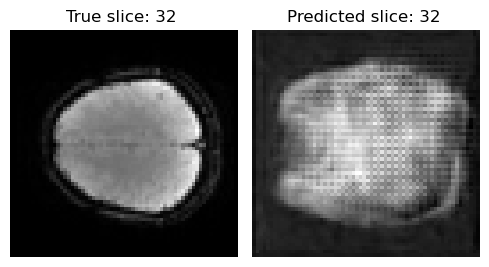

 Epoch 20: Training loss 0.6786859972136361 02:14:58.116065 
 Epoch 20: Validation loss 0.9375459551811218 02:14:58.116065 


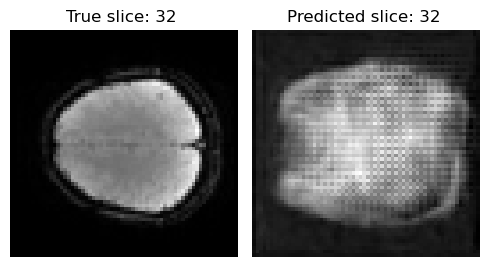

 Epoch 21: Training loss 0.6748805897576469 02:33:27.274001 
 Epoch 21: Validation loss 0.9637238383293152 02:33:27.274001 


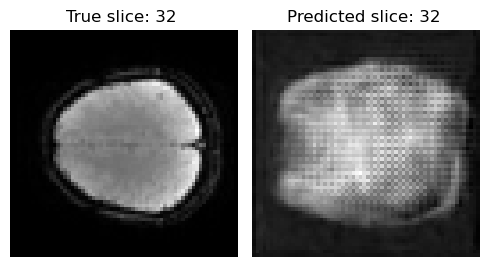

 Epoch 22: Training loss 0.6365924520151955 02:53:04.236971 
 Epoch 22: Validation loss 0.8857107758522034 02:53:04.236971 


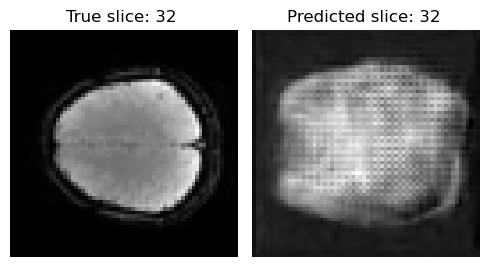

 Epoch 23: Training loss 0.6925358431679862 03:11:34.244861 
 Epoch 23: Validation loss 0.9175524115562439 03:11:34.244861 


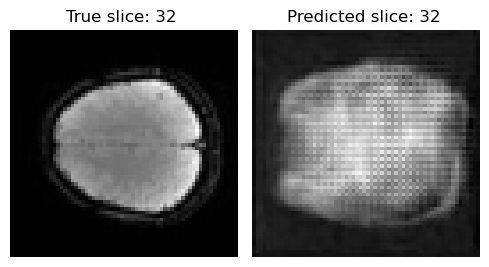

 Epoch 24: Training loss 0.6484236419200897 03:31:11.405291 
 Epoch 24: Validation loss 0.8808459043502808 03:31:11.406340 


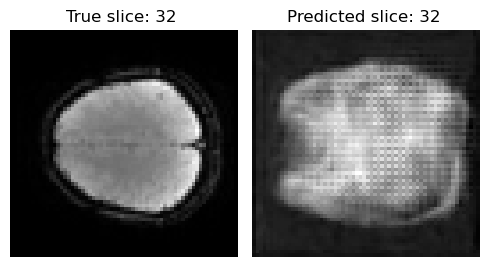

 Epoch 25: Training loss 0.6540845377104623 03:49:43.196888 
 Epoch 25: Validation loss 0.8306636214256287 03:49:43.196888 


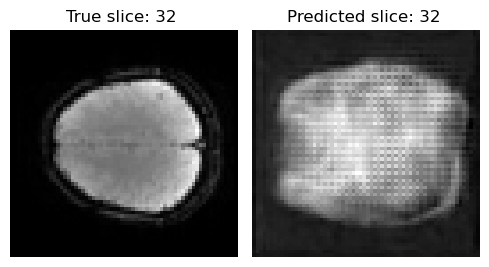

 Epoch 26: Training loss 0.6890073588916233 04:09:21.065834 
 Epoch 26: Validation loss 0.9315164685249329 04:09:21.065834 


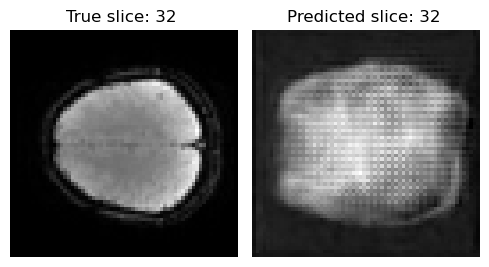

 Epoch 27: Training loss 0.6786760006632123 04:27:51.276519 
 Epoch 27: Validation loss 0.838380753993988 04:27:51.277555 


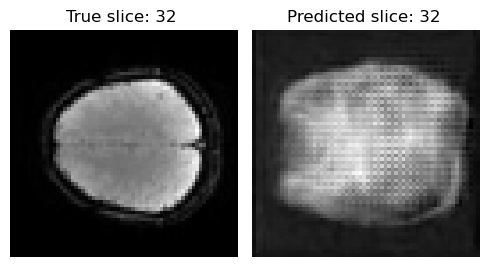

 Epoch 28: Training loss 0.6443561570984977 04:47:28.047647 
 Epoch 28: Validation loss 0.8527215719223022 04:47:28.047647 


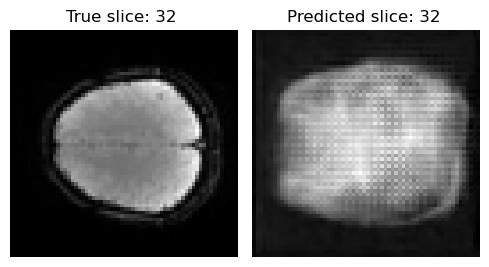

 Epoch 29: Training loss 0.6220372106347766 05:05:59.312555 
 Epoch 29: Validation loss 0.9040537476539612 05:05:59.313582 


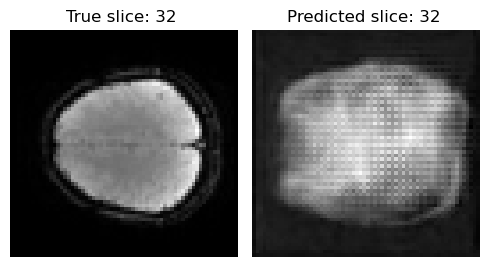

 Epoch 30: Training loss 0.6231110990047455 05:25:36.526387 
 Epoch 30: Validation loss 0.8020957112312317 05:25:36.526387 


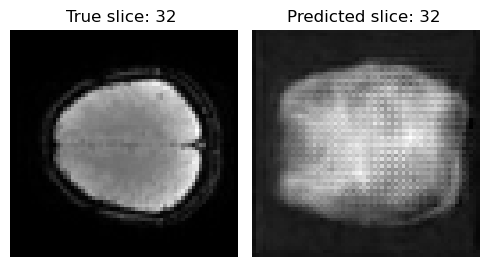

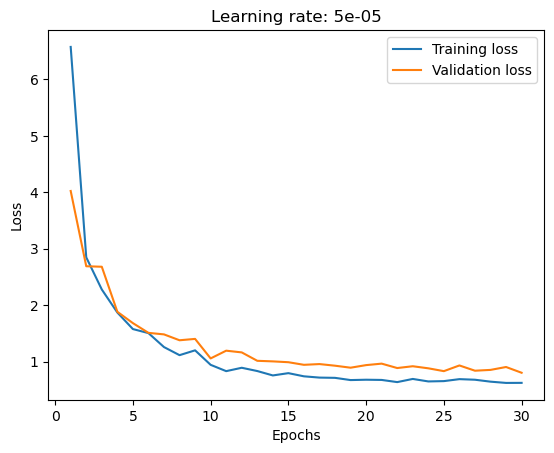

Testing hyperparameter: lr=1e-06
 Epoch 1: Training loss 11.100147519792829 05:44:06.332969 
 Epoch 1: Validation loss 10.378817558288574 05:44:06.332969 


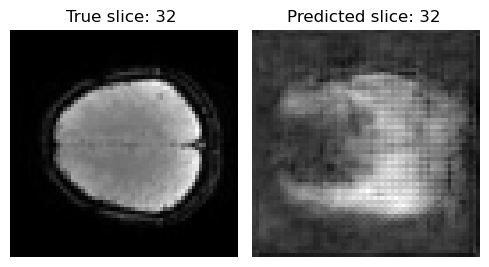

 Epoch 2: Training loss 11.276339939662389 06:03:46.736333 
 Epoch 2: Validation loss 9.785649299621582 06:03:46.736333 


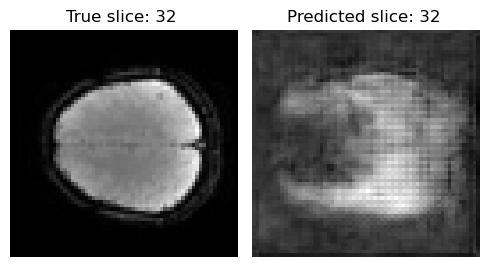

 Epoch 3: Training loss 10.461221286228724 06:22:17.160577 
 Epoch 3: Validation loss 9.287879943847656 06:22:17.160577 


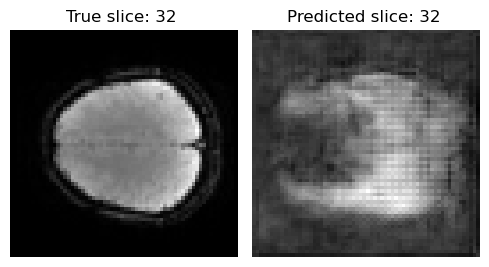

 Epoch 4: Training loss 9.930493354797363 06:41:55.095628 
 Epoch 4: Validation loss 8.869888305664062 06:41:55.095628 


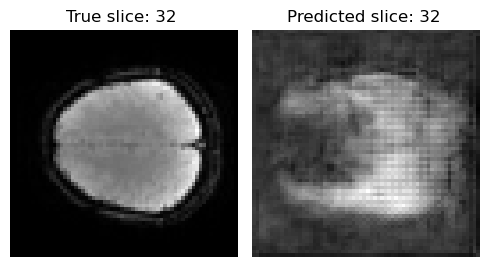

 Epoch 5: Training loss 9.430469649178642 07:00:30.469405 
 Epoch 5: Validation loss 8.495596885681152 07:00:30.469405 


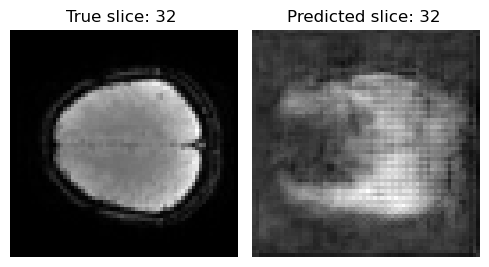

 Epoch 6: Training loss 9.325104440961566 07:20:10.893537 
 Epoch 6: Validation loss 8.174033164978027 07:20:10.893537 


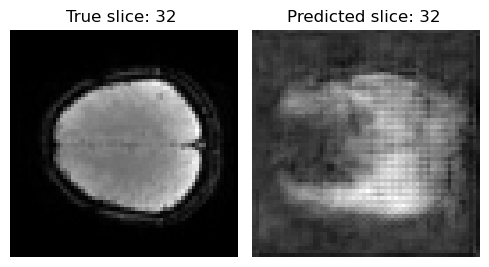

 Epoch 7: Training loss 8.819997923714775 07:38:42.453036 
 Epoch 7: Validation loss 7.889106273651123 07:38:42.453036 


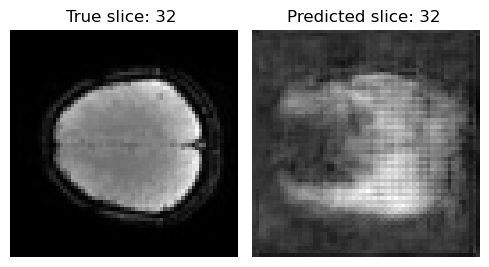

 Epoch 8: Training loss 8.125145503452845 07:58:22.380383 
 Epoch 8: Validation loss 7.622159957885742 07:58:22.380383 


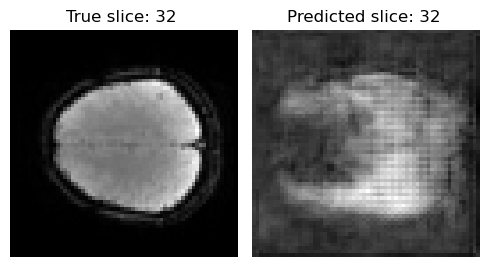

 Epoch 9: Training loss 7.7272129740033835 08:16:57.553896 
 Epoch 9: Validation loss 7.369865417480469 08:16:57.554934 


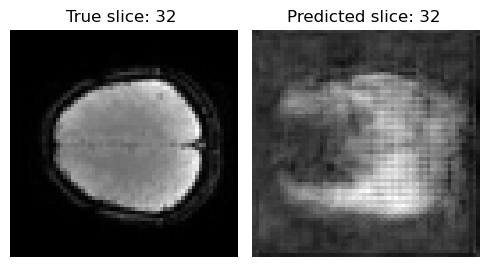

 Epoch 10: Training loss 7.6638166563851495 08:36:36.251557 
 Epoch 10: Validation loss 7.136205673217773 08:36:36.251557 


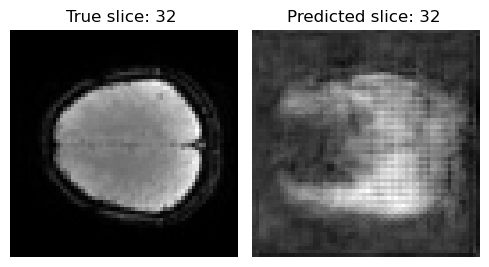

 Epoch 11: Training loss 7.431862831115723 08:55:08.308254 
 Epoch 11: Validation loss 6.9304609298706055 08:55:08.308254 


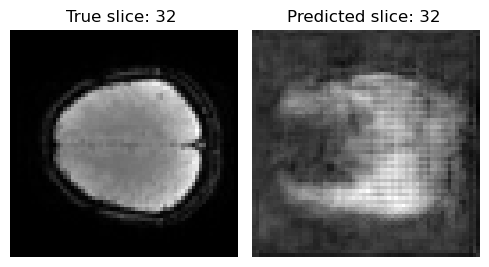

 Epoch 12: Training loss 7.29241807120187 09:14:47.068532 
 Epoch 12: Validation loss 6.7329840660095215 09:14:47.068532 


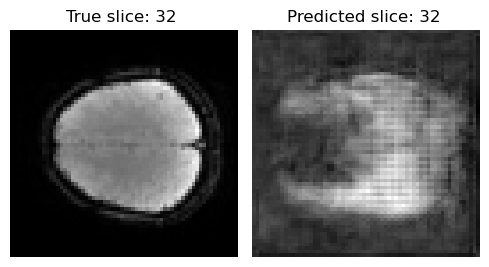

 Epoch 13: Training loss 6.661670957292829 09:33:18.242890 
 Epoch 13: Validation loss 6.549259185791016 09:33:18.243977 


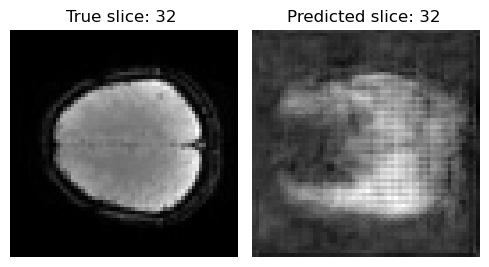

 Epoch 14: Training loss 6.708005019596645 09:52:57.287611 
 Epoch 14: Validation loss 6.3688225746154785 09:52:57.287611 


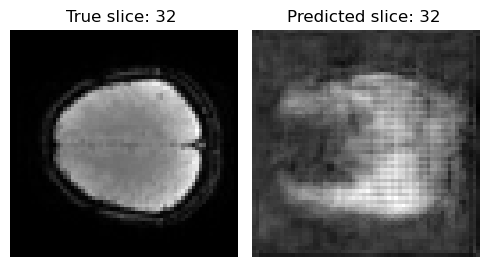

 Epoch 15: Training loss 6.385794707706997 10:11:29.123197 
 Epoch 15: Validation loss 6.205573081970215 10:11:29.123197 


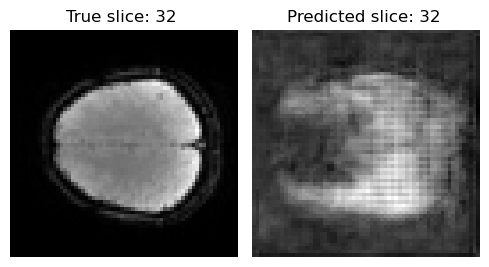

 Epoch 16: Training loss 6.18318475995745 10:31:07.747016 
 Epoch 16: Validation loss 6.042524814605713 10:31:07.747016 


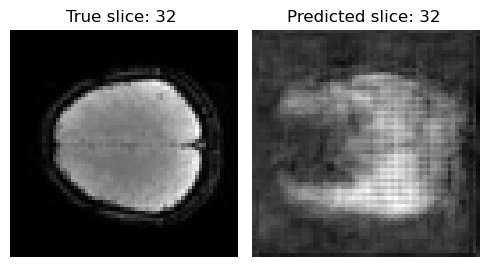

 Epoch 17: Training loss 6.038549423217773 10:49:39.665445 
 Epoch 17: Validation loss 5.900146961212158 10:49:39.666501 


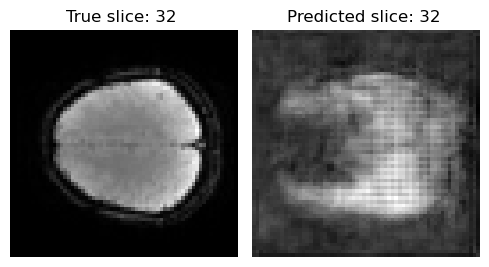

 Epoch 18: Training loss 5.627959796360561 11:09:19.235745 
 Epoch 18: Validation loss 5.74852991104126 11:09:19.235745 


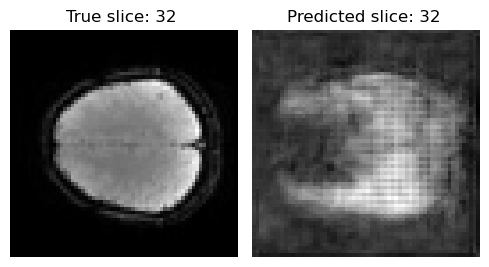

 Epoch 19: Training loss 5.4201803888593405 11:27:51.496896 
 Epoch 19: Validation loss 5.596506118774414 11:27:51.496896 


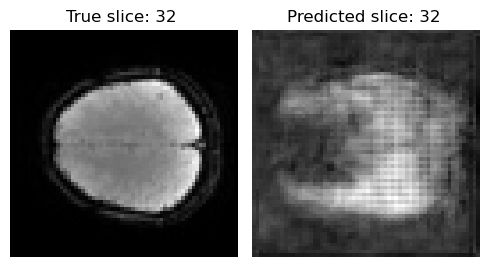

 Epoch 20: Training loss 5.50143677847726 11:47:30.234765 
 Epoch 20: Validation loss 5.463032245635986 11:47:30.234765 


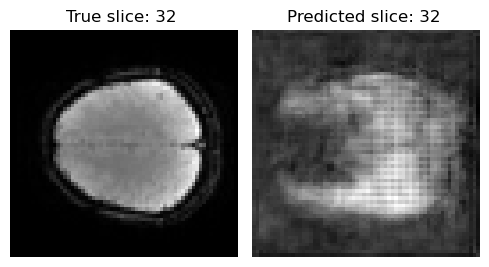

 Epoch 21: Training loss 5.250528471810477 12:06:03.211708 
 Epoch 21: Validation loss 5.334558010101318 12:06:03.211708 


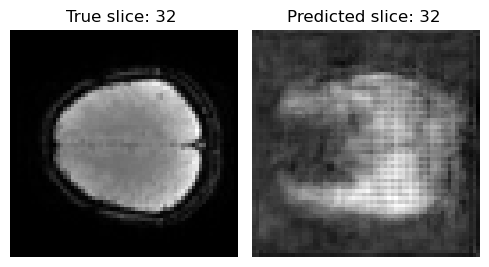

 Epoch 22: Training loss 4.981125559125628 12:25:45.087485 
 Epoch 22: Validation loss 5.202698230743408 12:25:45.087485 


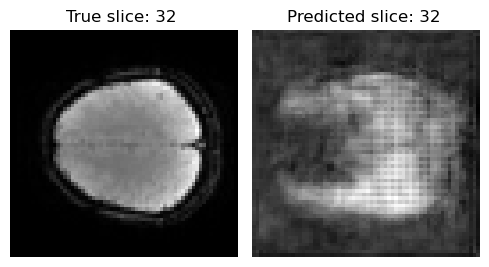

 Epoch 23: Training loss 5.115968567984445 12:44:16.835486 
 Epoch 23: Validation loss 5.096402645111084 12:44:16.835486 


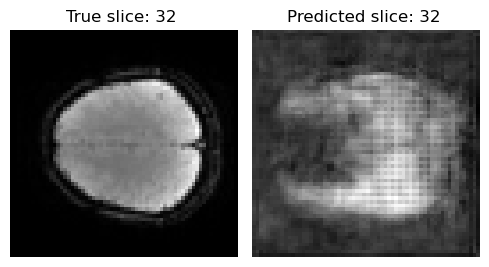

 Epoch 24: Training loss 5.030756201062884 13:03:57.131900 
 Epoch 24: Validation loss 4.997631549835205 13:03:57.131900 


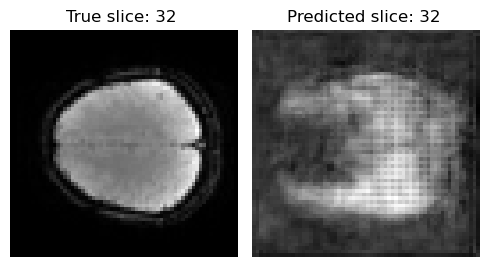

 Epoch 25: Training loss 4.838850157601493 13:22:29.496748 
 Epoch 25: Validation loss 4.901182651519775 13:22:29.496748 


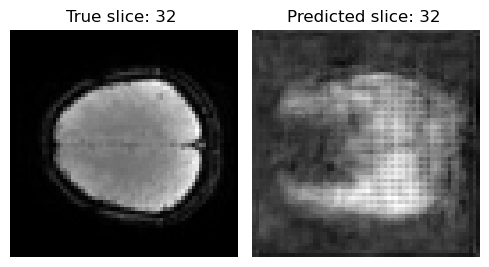

 Epoch 26: Training loss 4.657667977469308 13:42:22.993298 
 Epoch 26: Validation loss 4.8015570640563965 13:42:22.993298 


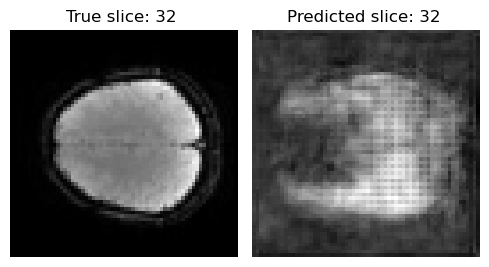

 Epoch 27: Training loss 4.749535833086286 14:01:29.574144 
 Epoch 27: Validation loss 4.72023868560791 14:01:29.574144 


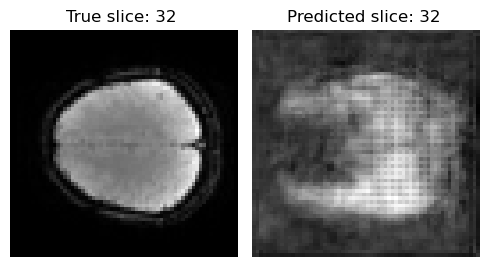

 Epoch 28: Training loss 4.668040105274746 14:21:40.487272 
 Epoch 28: Validation loss 4.656424045562744 14:21:40.487272 


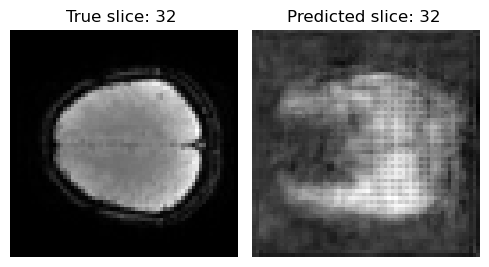

 Epoch 29: Training loss 4.329403059823172 14:40:47.527889 
 Epoch 29: Validation loss 4.581731796264648 14:40:47.527889 


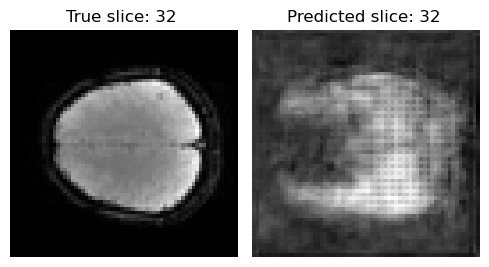

 Epoch 30: Training loss 4.25646676336016 15:01:00.178148 
 Epoch 30: Validation loss 4.4956583976745605 15:01:00.178148 


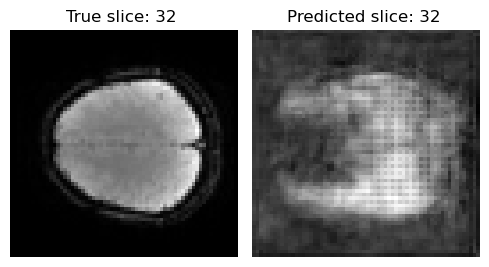

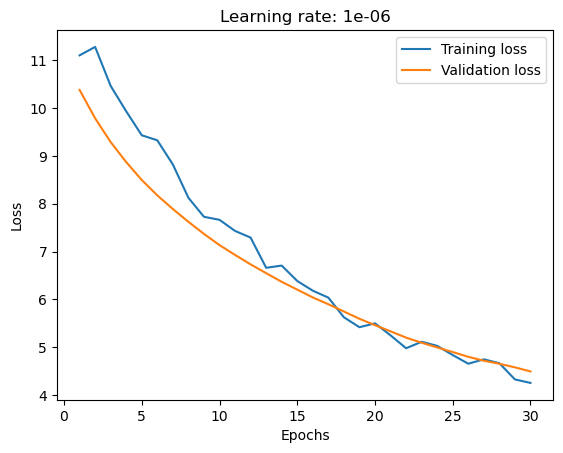

In [ ]:
results = [] 


# Hyperparameter combinations to try
learning_rates = [1e-5, 5e-5, 1e-6]
loss_functions = [MAE_SSIM_loss, MSE_loss]

# Loop through different hyperparameter combinations
for lr in learning_rates:
    for loss_fn in loss_functions:

        print(f"Testing hyperparameter: lr={lr}")
        
        # Set seed and initialize the data loaders
        set_seed(42)
        batch_size = 1
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, generator=torch.Generator().manual_seed(42))
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, generator=torch.Generator().manual_seed(42))

        # Initialize the model
        model = UNet4D()
        model.to(device=device)

        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        n_epochs = 30
        
        train_loss, val_loss = [], []  # To store loss values for each epoch

        
        for epoch in range(1, n_epochs+1):
            train_epoch_loss, val_epoch_loss = augmented_train(optimizer, model, loss_fn, train_loader, val_loader)
            train_loss.append(train_epoch_loss)
            val_loss.append(val_epoch_loss)

            print(f' Epoch {epoch}: Training loss {train_epoch_loss} {datetime.now().time()} ')
            if val_loader != None:
                print(f' Epoch {epoch}: Validation loss {val_epoch_loss} {datetime.now().time()} ')

            # Get the predictions
            preds, true = predictions(model, val_loader)
            

            preds_cpu = preds[0].cpu()
            true_cpu = true[0].cpu()
            preds0= preds_cpu.squeeze(0,1)
            true0= true_cpu.squeeze(0,1)

            # Plotting the current predictions
            fig, axes = plt.subplots(1, 2, figsize=(5,5))

            i = 32
            pred = preds0[0,:,:,i]
            tru = true0[0,:,:,i]

            axes[0].imshow(tru, cmap='gray')
            axes[0].set_title(f'True slice: {i} ')
            axes[0].axis('off')

            axes[1].imshow(pred, cmap='gray')
            axes[1].set_title(f'Predicted slice: {i} ')
            axes[1].axis('off')

            plt.tight_layout()
            plt.show()

            # Saving the images for later use
            plt_savename = f'./4D_model_weights/img_epoch{epoch}_lr{lr}.png'
            fig.savefig(plt_savename)
            
            filename = f'./4D_model_weights/weights_model_lr{lr}_epoch{epoch}.pth'
            # Save the model's state_dict to a file
            save_checkpoint(model, optimizer, epoch, val_epoch_loss, filename=filename)

            result = {
                'learning rate': lr,
                'epoch': epoch,
                'loss' : val_epoch_loss
                }
            results.append(result)

        # Plot the losses for this configuration
        plot_losses(train_loss, val_loss, len(train_loss))

        # Saving the training and validation losses
        val_loss_list_filename = f'./4D_model_weights/val_loss_model_lr{lr}.json'
        train_loss_list_filename = f'./4D_model_weights/train_loss_model_lr{lr}.json'

        with open(val_loss_list_filename, "w") as val_loss_file:
            json.dump(val_loss, val_loss_file)

        with open(train_loss_list_filename, "w") as train_loss_file:
            json.dump(train_loss, train_loss_file)
        
        plt.title(f'Learning rate: {lr}')
        plt.show()

with open("./4D_model_weights/results_lr1e-5_5e-5_1e-6.json", "w") as file:
    json.dump(results, file)